### Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.


### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

### Since the NCDC Website is down, I can't obtain data from it using web crab. i will be using the data provided in the github library named covidng.csv

In [1]:
# Write Your Code Below
# Import all libraries in this cell
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')
import os
import glob
import datetime as dt


In [2]:
# Save the data to a DataFrame object.

# checking the current working directory

var = os.getcwd()
print(var)

# importing the data covidnig.csv from  directory

covidng_df = pd.read_csv('covidnig.csv')

covidng_df.head()

# taking of the commas from the figures

covidng_df.replace(',','' , regex = True , inplace = True)

covidng_df.head()


c:\Users\EMMANUELA\Desktop\Nigeria-COVID-19-Data-Analysis-Using-Python


,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46


### B - Obtaing  Data From John Hopkins Data Repository
#### after downloading the data and saving it locally


In [3]:


# getting the global confirmed  cases data


glconfirmed_df = pd.read_csv("time_series_covid19_confirmed_global.csv")

glconfirmed_df.head()



,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [4]:

# getting the global death case data


gldeathcase_df = pd.read_csv("time_series_covid19_deaths_global.csv")

gldeathcase_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [5]:
#[Write Your Code Here]
# getting the global recovered cases data


glrecovered_df = pd.read_csv("time_series_covid19_recovered_global.csv")

glrecovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### C - Getting External Data From Github
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [6]:

# saving each of the data provided into a seperate dataframe

covidex_df = pd.read_csv('covid_external.csv')
covidex_df.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [7]:

# saving each of the data provided into a seperate dataframe
# saving the budget data into a dataframe 

budgetdata_df = pd.read_csv('Budget data.csv')
budgetdata_df.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [8]:

# saving each of the data provided into a seperate dataframe
# saving the RealGDP data into a dataframe 

RealGDP_df = pd.read_csv('RealGDP.csv')
RealGDP_df.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


### Task 3 - Data Cleaning and Preparation


#  Preparing the daily confirmed  case data world wide and later getting nigeria data from it.

In [9]:
#[Write Your Code Here]

glconfirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


### Arranging the data presented  into a good format which is easily understandable

In [10]:
glconfcovid = pd.melt(glconfirmed_df, id_vars=["Province/State", "Country/Region","Lat","Long"], 
        var_name="Date", 
        value_name="Case")
glconfcovid.head()

# excluding the province/state column from the data
 
glconfcovid_df = glconfcovid[['Country/Region','Date','Case']]

# this is the global data of daily confirmed cases.

glconfcovid_df

,Country/Region,Date,Case
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
...,...,...,...
330322,West Bank and Gaza,3/9/23,703228
330323,Winter Olympics 2022,3/9/23,535
330324,Yemen,3/9/23,11945
330325,Zambia,3/9/23,343135


### Performing more analyses on global confirmed cases data

In [11]:

glconfcovid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330327 entries, 0 to 330326
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Country/Region  330327 non-null  object
 1   Date            330327 non-null  object
 2   Case            330327 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 7.6+ MB


In [12]:
# converting the date column to date time

glconfcovid_df['Date'] = pd.to_datetime(glconfcovid_df['Date'])

glconfcovid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330327 entries, 0 to 330326
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Country/Region  330327 non-null  object        
 1   Date            330327 non-null  datetime64[ns]
 2   Case            330327 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 7.6+ MB


In [13]:
glconfcovid_df

,Country/Region,Date,Case
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
330322,West Bank and Gaza,2023-03-09,703228
330323,Winter Olympics 2022,2023-03-09,535
330324,Yemen,2023-03-09,11945
330325,Zambia,2023-03-09,343135


### Getting  nigeria daily confirmed cases from the global data provide

In [14]:

nig = glconfcovid_df['Country/Region'] == 'Nigeria'

In [15]:
Nigc =  glconfcovid_df[nig]

# extracting just the date and case from the data as required
DailyNigConfirm_df = Nigc[['Date','Case']]

DailyNigConfirm_df

,Date,Case
206,2020-01-22,0
495,2020-01-23,0
784,2020-01-24,0
1073,2020-01-25,0
1362,2020-01-26,0
...,...,...
329088,2023-03-05,266598
329377,2023-03-06,266598
329666,2023-03-07,266598
329955,2023-03-08,266598


### Performing analyses on the global daily death cases data which was been imported

In [16]:
#  the daily global death data as below
gldeathcase_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [17]:
gldeathcase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


In [18]:
globdeat = pd.melt(gldeathcase_df, id_vars=['Province/State','Country/Region','Lat','Long'],
                   var_name = "Date",
                   value_name = "Case"
                  )

globdeat

,Province/State,Country/Region,Lat,Long,Date,Case
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
330322,NaN,West Bank and Gaza,31.952200,35.233200,3/9/23,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,3/9/23,0
330324,NaN,Yemen,15.552727,48.516388,3/9/23,2159
330325,NaN,Zambia,-13.133897,27.849332,3/9/23,4057


In [19]:
globdeath_df = globdeat[['Country/Region','Date','Case']]

globdeath_df

,Country/Region,Date,Case
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
...,...,...,...
330322,West Bank and Gaza,3/9/23,5708
330323,Winter Olympics 2022,3/9/23,0
330324,Yemen,3/9/23,2159
330325,Zambia,3/9/23,4057


In [20]:
# getting more information on the global death dataframe

globdeath_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330327 entries, 0 to 330326
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Country/Region  330327 non-null  object
 1   Date            330327 non-null  object
 2   Case            330327 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 7.6+ MB


In [21]:
# converting the Date column into datetime format

globdeath_df['Date'] = pd.to_datetime(globdeath_df['Date'])

globdeath_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330327 entries, 0 to 330326
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Country/Region  330327 non-null  object        
 1   Date            330327 non-null  datetime64[ns]
 2   Case            330327 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 7.6+ MB


In [22]:
globdeath_df

,Country/Region,Date,Case
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
330322,West Bank and Gaza,2023-03-09,5708
330323,Winter Olympics 2022,2023-03-09,0
330324,Yemen,2023-03-09,2159
330325,Zambia,2023-03-09,4057


In [23]:
# Getting the daily death for nigeria

nigdaily = globdeath_df['Country/Region'] == 'Nigeria'

nigerd = globdeath_df[nigdaily]

nigerd

,Country/Region,Date,Case
206,Nigeria,2020-01-22,0
495,Nigeria,2020-01-23,0
784,Nigeria,2020-01-24,0
1073,Nigeria,2020-01-25,0
1362,Nigeria,2020-01-26,0
...,...,...,...
329088,Nigeria,2023-03-05,3155
329377,Nigeria,2023-03-06,3155
329666,Nigeria,2023-03-07,3155
329955,Nigeria,2023-03-08,3155


In [24]:
# getting just the Date and case columns as required

dailydeathnig_df = nigerd[['Date','Case']]

dailydeathnig_df

,Date,Case
206,2020-01-22,0
495,2020-01-23,0
784,2020-01-24,0
1073,2020-01-25,0
1362,2020-01-26,0
...,...,...
329088,2023-03-05,3155
329377,2023-03-06,3155
329666,2023-03-07,3155
329955,2023-03-08,3155


### Performing more analyses on the global recovered cases 

In [25]:
# Preparing the imported data for daily recoverd cases 
glrecovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
glrecov = pd.melt(glrecovered_df,id_vars = ['Province/State','Country/Region','Lat','Long'],
                 var_name = 'Date',
                 value_name = 'Case'
                 )
glrecov

,Province/State,Country/Region,Lat,Long,Date,Case
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
313177,NaN,West Bank and Gaza,31.952200,35.233200,3/9/23,0
313178,NaN,Winter Olympics 2022,39.904200,116.407400,3/9/23,0
313179,NaN,Yemen,15.552727,48.516388,3/9/23,0
313180,NaN,Zambia,-13.133897,27.849332,3/9/23,0


In [27]:
glrecoverd = glrecov[['Country/Region','Date','Case']]

glrecoverd

,Country/Region,Date,Case
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
...,...,...,...
313177,West Bank and Gaza,3/9/23,0
313178,Winter Olympics 2022,3/9/23,0
313179,Yemen,3/9/23,0
313180,Zambia,3/9/23,0


In [28]:
# checking more information on the dataframe 

glrecoverd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313182 entries, 0 to 313181
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Country/Region  313182 non-null  object
 1   Date            313182 non-null  object
 2   Case            313182 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 7.2+ MB


In [29]:
# converting the date column to datetime 

glrecoverd['Date'] = pd.to_datetime(glrecoverd['Date'])

glrecoverd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313182 entries, 0 to 313181
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Country/Region  313182 non-null  object        
 1   Date            313182 non-null  datetime64[ns]
 2   Case            313182 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 7.2+ MB


In [30]:
glrecoverd

,Country/Region,Date,Case
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
313177,West Bank and Gaza,2023-03-09,0
313178,Winter Olympics 2022,2023-03-09,0
313179,Yemen,2023-03-09,0
313180,Zambia,2023-03-09,0


# getting daily recoverd cases for nigeria 

In [31]:
df = glrecoverd['Country/Region'] == 'Nigeria'

dailyrecnig_df = glrecoverd[df]

dailyrecnig_df

,Country/Region,Date,Case
191,Nigeria,2020-01-22,0
465,Nigeria,2020-01-23,0
739,Nigeria,2020-01-24,0
1013,Nigeria,2020-01-25,0
1287,Nigeria,2020-01-26,0
...,...,...,...
312003,Nigeria,2023-03-05,0
312277,Nigeria,2023-03-06,0
312551,Nigeria,2023-03-07,0
312825,Nigeria,2023-03-08,0


In [32]:
# showing just the date and case columne as required

dailyrecovniger = dailyrecnig_df[['Date','Case']]

dailyrecovniger

,Date,Case
191,2020-01-22,0
465,2020-01-23,0
739,2020-01-24,0
1013,2020-01-25,0
1287,2020-01-26,0
...,...,...
312003,2023-03-05,0
312277,2023-03-06,0
312551,2023-03-07,0
312825,2023-03-08,0


### Task 4 - Analysis On All The Data Imported


TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

In [33]:
covidng_df.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46


In [34]:
# converting the data type of the Number of cases column

covidng_df['No. of Cases (Lab Confirmed)'] = covidng_df['No. of Cases (Lab Confirmed)'].astype('Int64')

covidng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     Int64 
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: Int64(1), int64(1), object(3)
memory usage: 1.6+ KB


In [35]:
covidng_df.describe()

,No. of Cases (Lab Confirmed),No. of Deaths
count,37.000000,37.000000
mean,2119.837838,33.000000
std,4537.417740,41.797794
min,5.000000,2.000000
25%,381.000000,11.000000
50%,897.000000,21.000000
75%,1843.000000,36.000000
max,26708.000000,236.000000


#### From the information above we can deduct the max case recorded per state was 26708 and the minimum case per state was 5

# Converting the data type of values in the data frame for sorting 

In [36]:



covidng_df['No. of Cases (Lab Confirmed)'] = covidng_df['No. of Cases (Lab Confirmed)'].astype('Int64')

covidng_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     Int64 
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: Int64(1), int64(1), object(3)
memory usage: 1.6+ KB


In [37]:
# sorting out the data to get the 10 most recorded state. 

confnig_df = covidng_df.sort_values('No. of Cases (Lab Confirmed)', ascending = False)

confnig_df.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46


In [38]:
# getting the first 10 element in the data frame 

confdatanig =  confnig_df.head(10)

confdatanig


,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


In [39]:
confdatanig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               10 non-null     object
 1   No. of Cases (Lab Confirmed)  10 non-null     Int64 
 2   No. of Cases (on admission)   10 non-null     object
 3   No. Discharged                10 non-null     object
 4   No. of Deaths                 10 non-null     int64 
dtypes: Int64(1), int64(1), object(3)
memory usage: 490.0+ bytes


#  Plot to show the 10 state with the most covid cases

<AxesSubplot:xlabel='States Affected', ylabel='No. of Cases (Lab Confirmed)'>

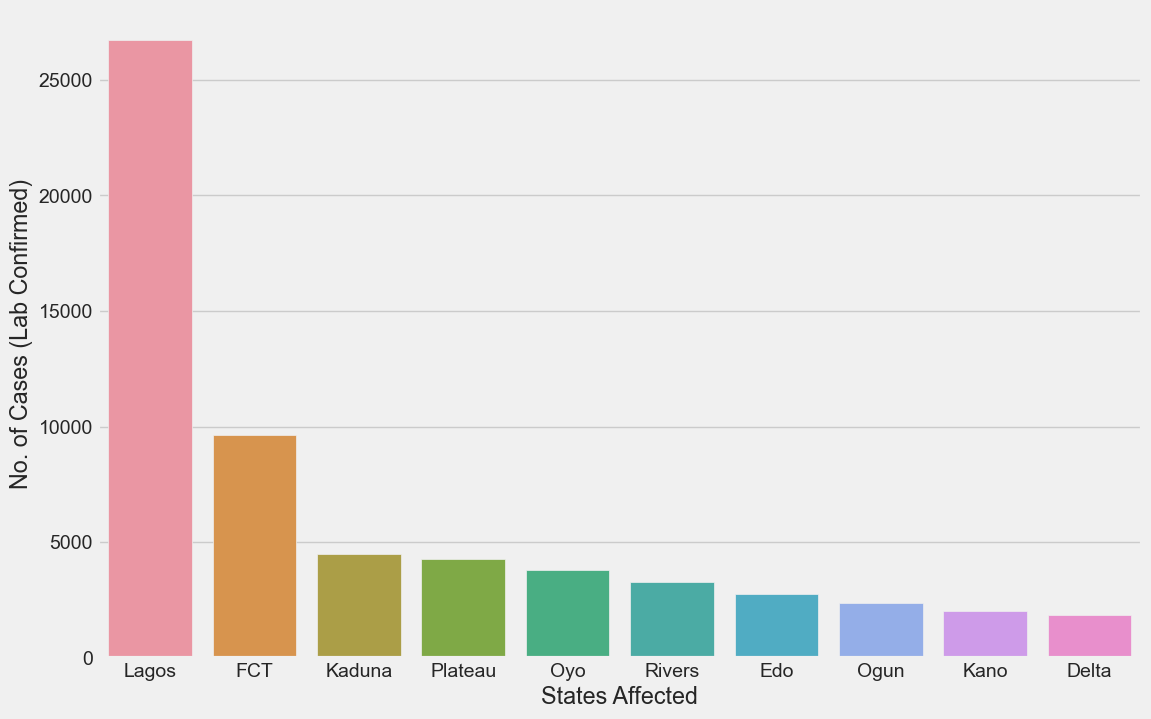

In [40]:
fig = plt.subplots(figsize = (12,8))
sns.barplot(data= confdatanig.reset_index(), x='States Affected', y='No. of Cases (Lab Confirmed)')


## From the above observation, Lagos state is the city with the most lab confirmed cases, while delta state is the least among the first 10 states 

TODO B - Generating a plot that shows the Top 10 states in terms of Discharged Covid cases. 

In [41]:
df = covidng_df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     Int64 
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: Int64(1), int64(1), object(3)
memory usage: 1.6+ KB


In [42]:
# converting the data type of discharge columns

df['No. Discharged'] = df['No. Discharged'].astype('Int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     Int64 
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     Int64 
 4   No. of Deaths                 37 non-null     int64 
dtypes: Int64(2), int64(1), object(2)
memory usage: 1.6+ KB


## Sorting the value to get the state with  most discharge cases in nigeria

In [43]:
sorval = df.sort_values("No. Discharged", ascending = False)
covidnigdis = sorval.head(10)
sorval.head(10)

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
3,Plateau,4262,280,3948,34
2,Kaduna,4504,579,3877,48
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


<AxesSubplot:xlabel='States Affected', ylabel='No. Discharged'>

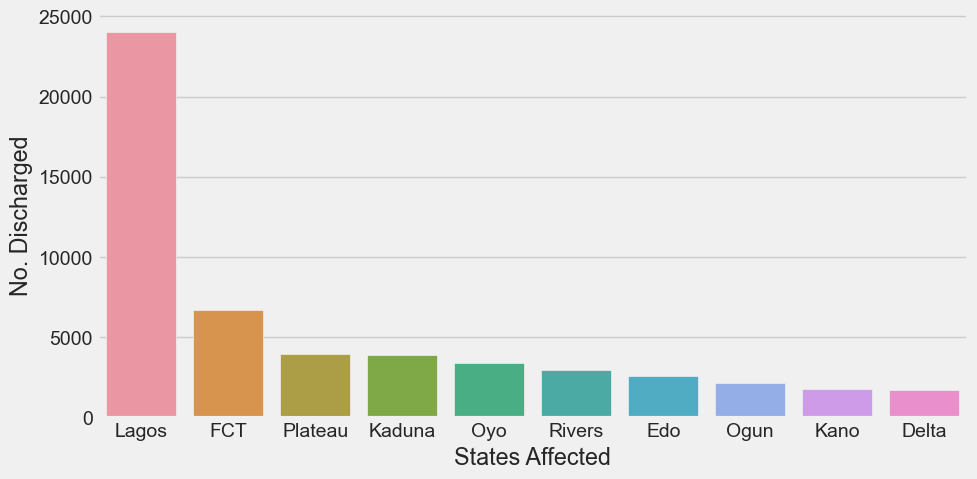

In [82]:
fig  = plt.subplots(figsize = (10,5))
sns.barplot(data = covidnigdis.reset_index(), x = 'States Affected' , y = 'No. Discharged')

## it is show above that lagos had the most discharge cases which is above 24500

TODO D - Plotting the state with the top 10 Death cases

In [88]:
df = covidng_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     Int64 
 2   No. of Cases (on admission)   37 non-null     Int64 
 3   No. Discharged                37 non-null     Int64 
 4   No. of Deaths                 37 non-null     int64 
 5   states                        37 non-null     object
dtypes: Int64(3), int64(1), object(2)
memory usage: 2.0+ KB


In [87]:
# CONVERTING NO OF CASES TO INT
covidng_df['No. of Cases (on admission)'] = covidng_df['No. of Cases (on admission)'].astype('Int64')

covidng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     Int64 
 2   No. of Cases (on admission)   37 non-null     Int64 
 3   No. Discharged                37 non-null     Int64 
 4   No. of Deaths                 37 non-null     int64 
 5   states                        37 non-null     object
dtypes: Int64(3), int64(1), object(2)
memory usage: 2.0+ KB


# Sorting the values

In [89]:
deathcen = df.sort_values("No. of Deaths", ascending = False)
numofdeath = deathcen.head(10)
deathcen.head(10)

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,states
0,Lagos,26708,2435,24037,236,Lagos
6,Edo,2768,52,2603,113,Edo
1,FCT,9627,2840,6694,93,FCT
5,Rivers,3279,232,2987,60,Rivers
8,Kano,2032,198,1778,56,Kano
9,Delta,1843,57,1737,49,Delta
2,Kaduna,4504,579,3877,48,Kaduna
4,Oyo,3788,368,3374,46,Oyo
10,Ondo,1793,62,1690,41,Ondo
19,Borno,778,37,705,36,Borno


<AxesSubplot:xlabel='States Affected', ylabel='No. of Deaths'>

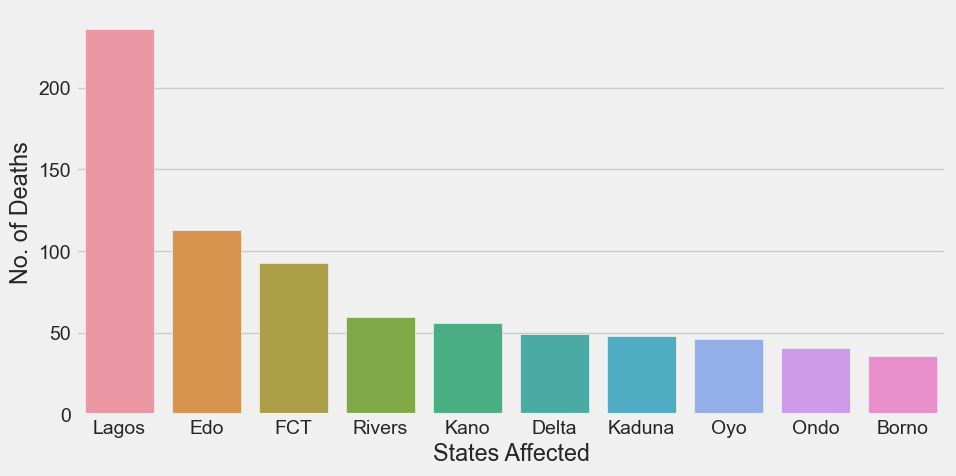

In [83]:
fig = plt.subplots(figsize = (10,5))
sns.barplot(data = numofdeath.reset_index(), x = 'States Affected' , y = 'No. of Deaths')

## It clear show above that lagos had the most death cases and Borno state had the least death cases among the top 10 states 

TODO E - Generating a line plot for the total daily confirmed, recovered and death cases in Nigeria

# Getting all the dataset for the various cases

In [48]:
df1 = DailyNigConfirm_df

df2 = dailydeathnig_df

df3 = dailyrecovniger


### plotting graph for total daily confirmed case

<AxesSubplot:xlabel='Date', ylabel='Case'>

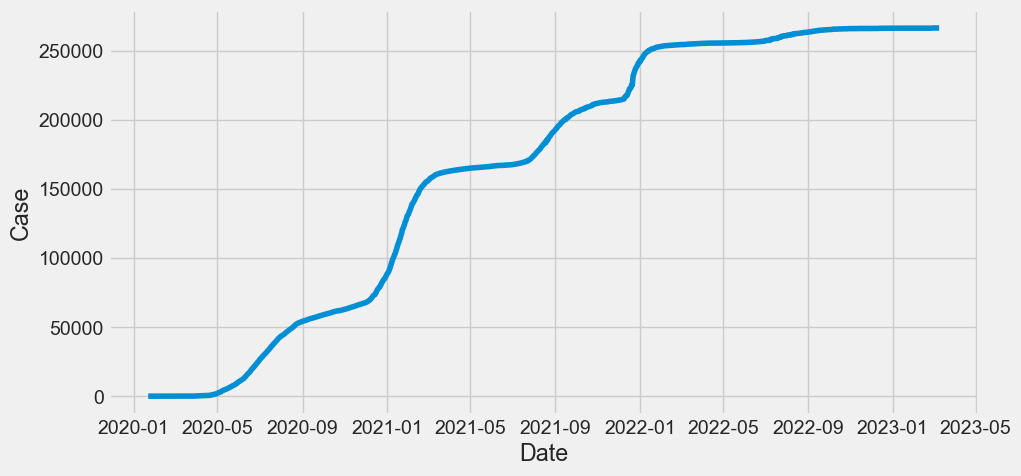

In [49]:
# plotting graph for total daily confirmed case

fig = plt.subplots(figsize = (10,5))
sns.lineplot( x = "Date", y = "Case", data = df1 )

### plotting graph for total daily death cases

<AxesSubplot:xlabel='Date', ylabel='Case'>

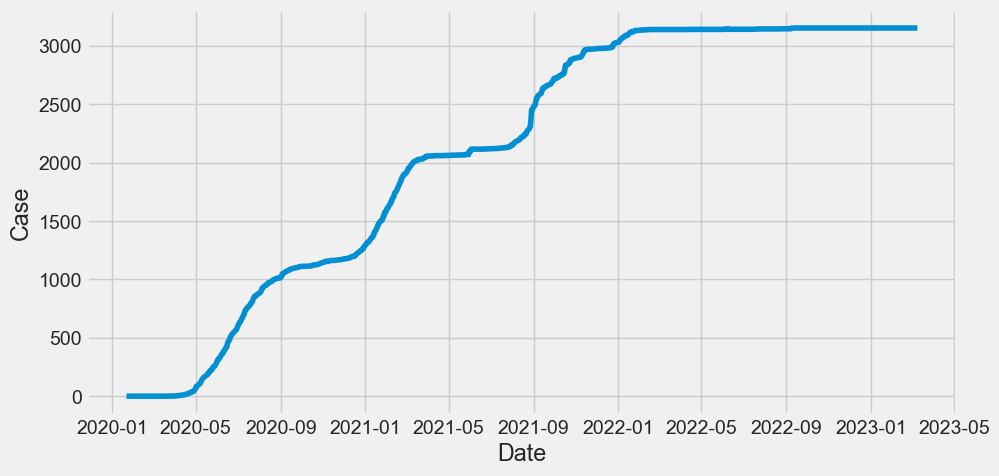

In [50]:
# plotting graph for total daily death cases

fig = plt.subplots(figsize = (10,5))
sns.lineplot( x = "Date", y = "Case", data = df2 )

### plotting graph for total daily recovered case

<AxesSubplot:xlabel='Date', ylabel='Case'>

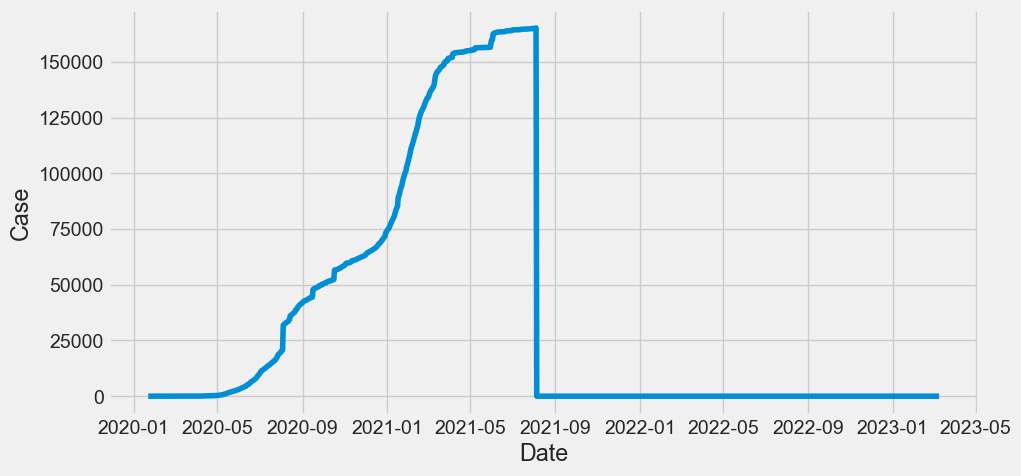

In [51]:
# plotting graph for total daily recovered case

fig = plt.subplots(figsize = (10,5))
sns.lineplot( x = "Date", y = "Case", data = df3 )

TODO F - 
* Determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.
* Generate a line plot for the above

In [52]:
# getting the daily infection rate

infecrate_df = df1.diff()


In [53]:
infecrate_df

infecrate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 206 to 330244
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype          
---  ------  --------------  -----          
 0   Date    1142 non-null   timedelta64[ns]
 1   Case    1142 non-null   float64        
dtypes: float64(1), timedelta64[ns](1)
memory usage: 59.1 KB


In [54]:
v = infecrate_df['Case'] > 0

dfff = infecrate_df[v]

dfff

,Date,Case
10899,1 days,1.0
13789,1 days,1.0
16101,1 days,1.0
16390,1 days,5.0
16968,1 days,4.0
...,...,...
305101,1 days,98.0
311170,1 days,69.0
312615,1 days,13.0
327354,1 days,130.0


In [55]:
nn = infecrate_df.nlargest(10,'Case')

nn

,Date,Case
202506,1 days,6158.0
106269,1 days,2464.0
105691,1 days,1964.0
202795,1 days,1940.0
108292,1 days,1883.0
103957,1 days,1867.0
107425,1 days,1861.0
166381,1 days,1823.0
201928,1 days,1772.0
101356,1 days,1664.0


## Generating a line plot for the daily infection rate. 

<AxesSubplot:xlabel='Date', ylabel='Case'>

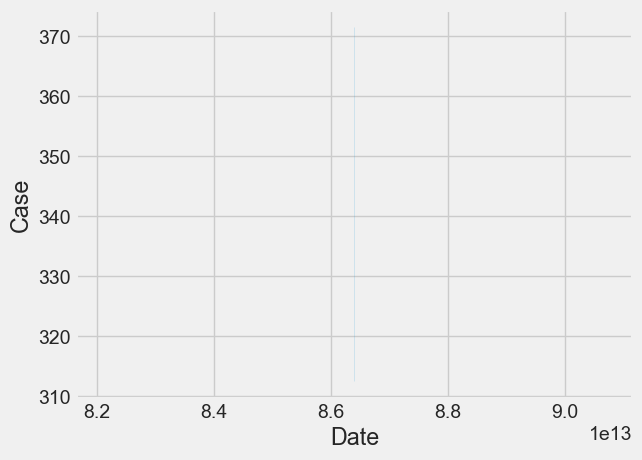

In [56]:
sns.lineplot(x = 'Date' , y = 'Case' , data = dfff.reset_index())

#### The infection rate increase by the multiple of 2 daily . it started with 210 and continues 430
#### The by making the difference 220

TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

In [57]:
maxforday = infecrate_df[['Date','Case']].max()

maxforday

Date    1 days 00:00:00
Case             6158.0
dtype: object

## The maximum infection rate for a day is 6158

In [58]:
df1.max()

Date    2023-03-09 00:00:00
Case                 266598
dtype: object

### The day with the maximum infection rate was on 2023-03-09

TODO H - Determining the relationship between the external dataset and the NCDC COVID-19 dataset. 
using lineplot

In [59]:
covidex_df.head()


,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [60]:
covidex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [61]:
covidng_df.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46


In [62]:
covidng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     Int64 
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     Int64 
 4   No. of Deaths                 37 non-null     int64 
dtypes: Int64(2), int64(1), object(2)
memory usage: 1.6+ KB


In [63]:
# changing the column name of states affected to states

covidng_df['states'] = covidng_df['States Affected']

covidng_df.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,states
0,Lagos,26708,2435,24037,236,Lagos
1,FCT,9627,2840,6694,93,FCT
2,Kaduna,4504,579,3877,48,Kaduna
3,Plateau,4262,280,3948,34,Plateau
4,Oyo,3788,368,3374,46,Oyo


In [64]:
# merging the two dataset to get a new dataframe

combinedata = pd.merge(covidex_df , covidng_df)

combinedata.head()


,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79,FCT,9627,2840,6694,93
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93,Plateau,4262,280,3948,34
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93,Kwara,1296,171,1094,31
3,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84,Niger,381,69,300,12
4,Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91,Benue,515,44,460,11


In [65]:
combinedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   states                        34 non-null     object 
 1   region                        34 non-null     object 
 2   Population                    34 non-null     int64  
 3   Overall CCVI Index            34 non-null     float64
 4   Age                           34 non-null     float64
 5   Epidemiological               34 non-null     float64
 6   Fragility                     34 non-null     float64
 7   Health System                 34 non-null     float64
 8   Population Density            34 non-null     float64
 9   Socio-Economic                34 non-null     float64
 10   Transport Availability       34 non-null     float64
 11  Acute IHR                     34 non-null     float64
 12  States Affected               34 non-null     object 
 13  No. of 

In [66]:
# getting the 10 states with the most cases.

toptenconf_df = combinedata.nlargest(10, 'No. of Cases (Lab Confirmed)')

toptenconf_df

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
28,Lagos,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93,Lagos,26708,2435,24037,236
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79,FCT,9627,2840,6694,93
13,Kaduna,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86,Kaduna,4504,579,3877,48
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93,Plateau,4262,280,3948,34
29,Oyo,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06,Oyo,3788,368,3374,46
24,Rivers,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00,Rivers,3279,232,2987,60
23,Edo,South South,4705000,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09,Edo,2768,52,2603,113
30,Ogun,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07,Ogun,2382,174,2175,33
12,Kano,North West,14726000,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87,Kano,2032,198,1778,56
25,Delta,South South,6303000,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08,Delta,1843,57,1737,49


# plotting the graph of the top 10 confirm cases and the overall ccvi on the same axis

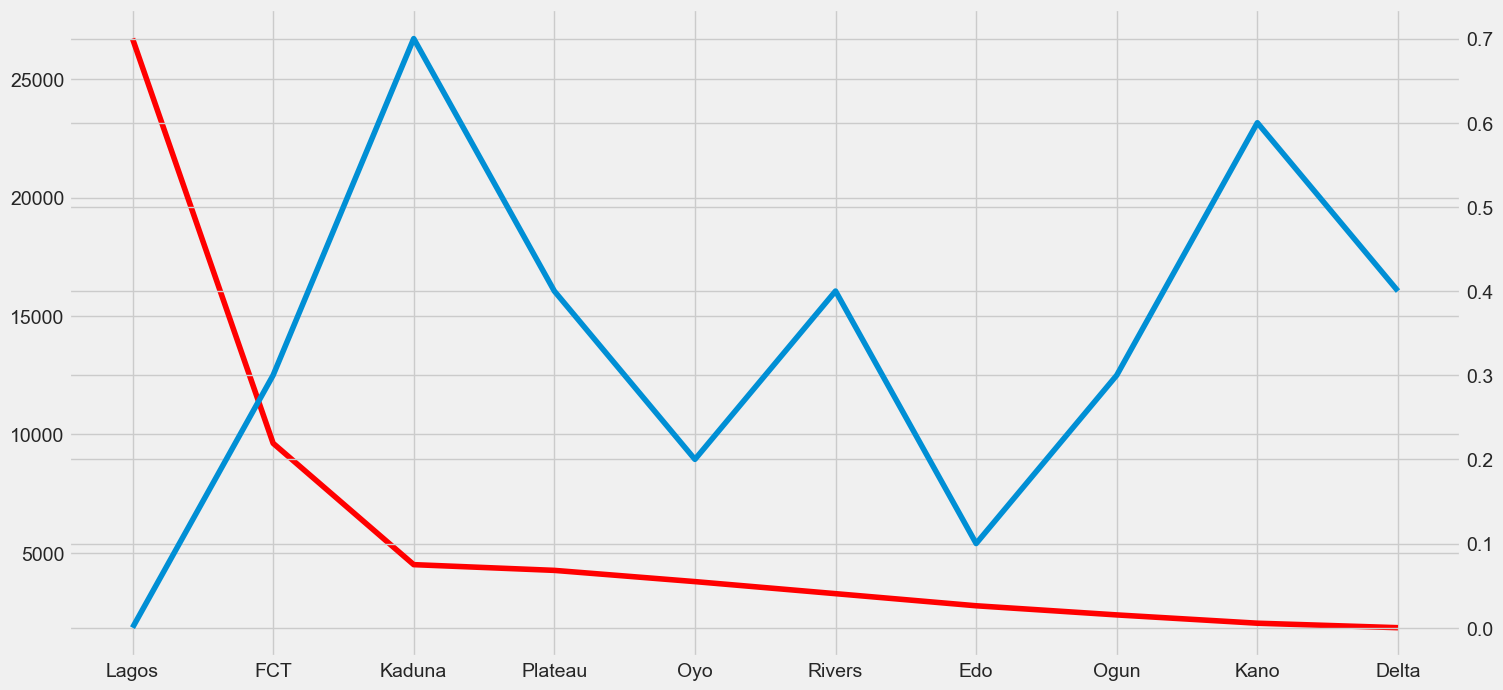

In [67]:
# ploting the plot using matplotlib

#setting the color
colorcases = 'red'

# setting the axis

# ax1.set_xlabel("States")
#ax1.set_ylabel("No. of Cases (Lab Confirmed)" , color = 'red' , fontsize = 14)
#ax2.set_ylabel("Overall CCVI Index", color = 'blue' , fontsize = 14)

fig , ax1 = plt.subplots(figsize=(16,8))
ax2 = ax1.twinx()

ax1.plot(toptenconf_df['states'] ,toptenconf_df['No. of Cases (Lab Confirmed)'] , color = colorcases )
ax2.plot(toptenconf_df['states'], toptenconf_df['Overall CCVI Index'] );




# it is seen above that as the number of covid cases get to the highest case recorded, the overall ccvi also increases and get to the top , as the number covid case reduce per state the CCVI also reduce and it increases when the state record high covid cases

TODO I - Determining the relationship between the external dataset and the NCDC COVID-19 dataset. 
* Using a regression plot 


In [68]:
# ploting a regression plot
toptenconf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 28 to 25
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   states                        10 non-null     object 
 1   region                        10 non-null     object 
 2   Population                    10 non-null     int64  
 3   Overall CCVI Index            10 non-null     float64
 4   Age                           10 non-null     float64
 5   Epidemiological               10 non-null     float64
 6   Fragility                     10 non-null     float64
 7   Health System                 10 non-null     float64
 8   Population Density            10 non-null     float64
 9   Socio-Economic                10 non-null     float64
 10   Transport Availability       10 non-null     float64
 11  Acute IHR                     10 non-null     float64
 12  States Affected               10 non-null     object 
 13  No. of

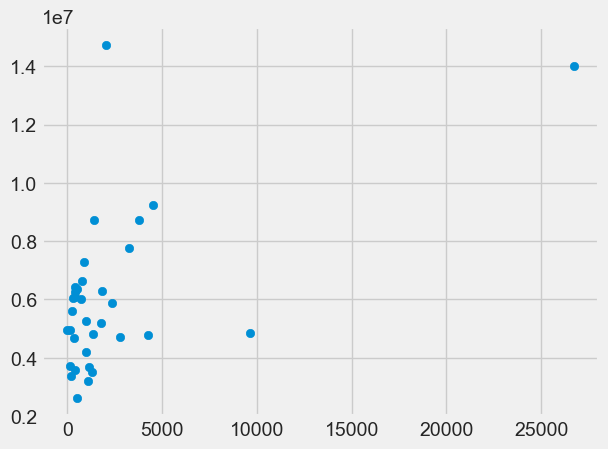

In [69]:
# drawing a regression plot using matplotlib function
plt.scatter( x = 'No. of Cases (Lab Confirmed)' , y = 'Population',data=combinedata)

TODO J - Performing more analyses on the combine data frame  above

<AxesSubplot:xlabel='Population Density', ylabel='No. of Cases (Lab Confirmed)'>

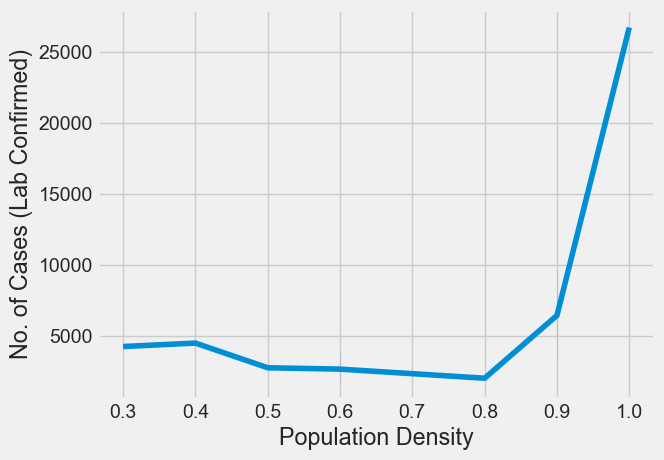

In [70]:
#  Plotting a line chat of population density v number of cases

sns.lineplot(data = toptenconf_df , x = 'Population Density' , y = 'No. of Cases (Lab Confirmed)')

# it is seen that , the number of confirmed covid lab cases increases as the population density gets higher.

### TODO L - 
Determining the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)


In [71]:
RealGDP_df

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [72]:
Realgdp = pd.melt( RealGDP_df , id_vars=('Year'), var_name = 'Quarters' , value_name= 'Values' )

Realgdp.head()

# Realgdp.info()

,Year,Quarters,Values
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19


In [73]:
# RealGDP for 2018
f = Realgdp['Year'] == 2017

Realgdp2017 = Realgdp[f]

Realgdp2017

,Year,Quarters,Values
3,2017,Q1,15797965.83
10,2017,Q2,16334719.27
17,2017,Q3,17760228.17
24,2017,Q4,18598067.07


In [74]:
# RealGDP for 2018

f = Realgdp['Year'] == 2018

Realgdp2018 = Realgdp[f]

Realgdp2018

,Year,Quarters,Values
4,2018,Q1,16096654.19
11,2018,Q2,16580508.07
18,2018,Q3,18081342.10
25,2018,Q4,19041437.59


In [75]:
# getting all 2019 data
df = Realgdp['Year'] == 2019
realgdp2019 = Realgdp[df]

realgdp2019

,Year,Quarters,Values
5,2019,Q1,16434552.65
12,2019,Q2,16931434.89
19,2019,Q3,18494114.17
26,2019,Q4,19530000.00


In [76]:
dff = Realgdp['Year'] == 2020
realgdp2020 = Realgdp[dff]
realgdp2020

,Year,Quarters,Values
6,2020,Q1,16740000.0
13,2020,Q2,15890000.0
20,2020,Q3,17820000.0
27,2020,Q4,0.0


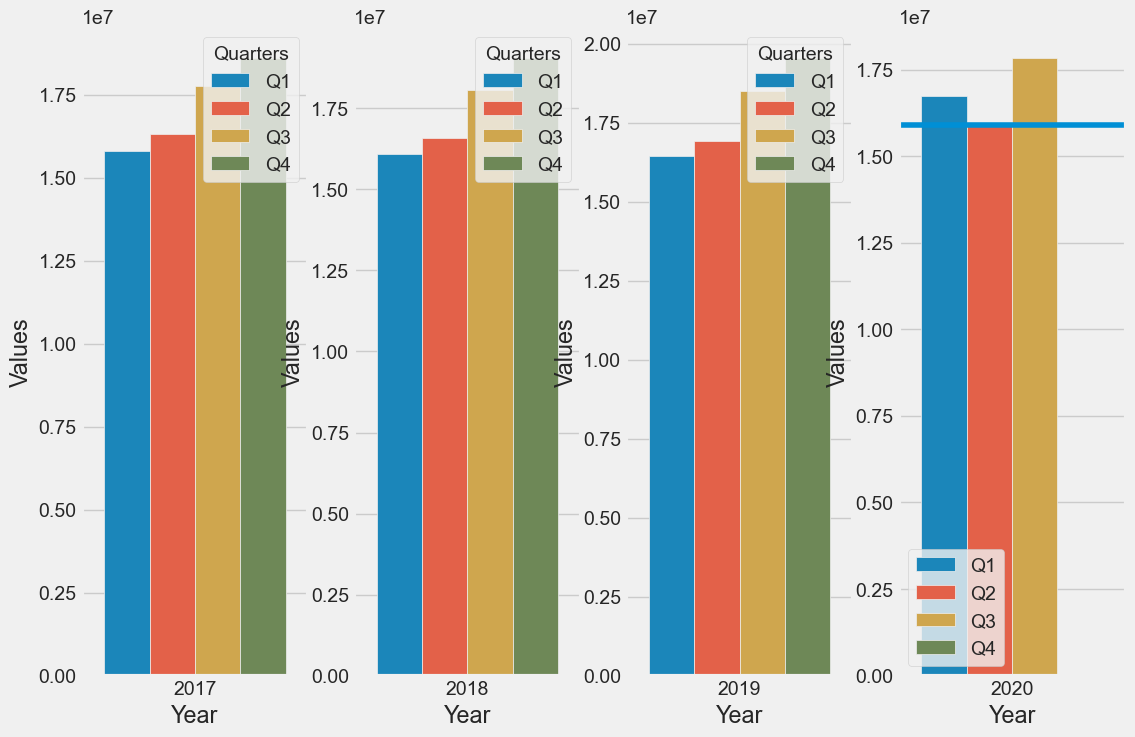

In [77]:
# ploting the graph

fig , axarr = plt.subplots(1, 4 , figsize=(12,8))

sns.barplot(data= Realgdp2017.reset_index(), x='Year', y='Values', hue = 'Quarters',ax =  axarr[0])


sns.barplot(data= Realgdp2018.reset_index(), x='Year', y='Values', hue = 'Quarters',ax =  axarr[1])


sns.barplot(data= realgdp2019.reset_index(), x='Year', y='Values', hue='Quarters' , ax = axarr[2])



graph = sns.barplot(data= realgdp2020.reset_index(), x='Year', y='Values', hue = 'Quarters',ax =  axarr[3])

graph.axhline(15890000.0)

plt.legend(loc = 'lower left')




### In the year 2017 before the covid, the Real Gdp was increasing steadily from quarter 1 to quarter 4. 
### when covid 19 started , the real gdp decrease after the first quarter because it hit the economy hard and after the second quarter it rises back in 2020.

# STAND OUT SECTION

### Note: Do not limit your analysis to the provided TODOs. Perform more analyses e.g 
* Check for more external dataset
* Ask more questions & find the right answers by exploring the data

In [78]:
# viewing the budget of each state before covid

budgetdata_df.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [79]:
budgetdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


In [80]:
# getting for the first ten state with the highest budget before  covid hit

tenbudget = budgetdata_df.nlargest(10,'Initial_budget (Bn)')

tenbudget

,states,Initial_budget (Bn),Revised_budget (Bn)
23,Lagos,1680.00,920.50
8,Cross River,1100.00,147.10
2,Akwa-Ibom,597.73,366.00
31,Rivers,530.80,300.40
26,Ogun,449.90,280.00
9,Delta,395.50,282.30
36,FCT,278.78,199.00
17,Kaduna,259.25,223.60
19,Katsina,244.00,213.00
5,Bayelsa,242.18,183.15


### Let see how covid affected the budget of each state

<AxesSubplot:xlabel='states', ylabel='Revised_budget (Bn)'>

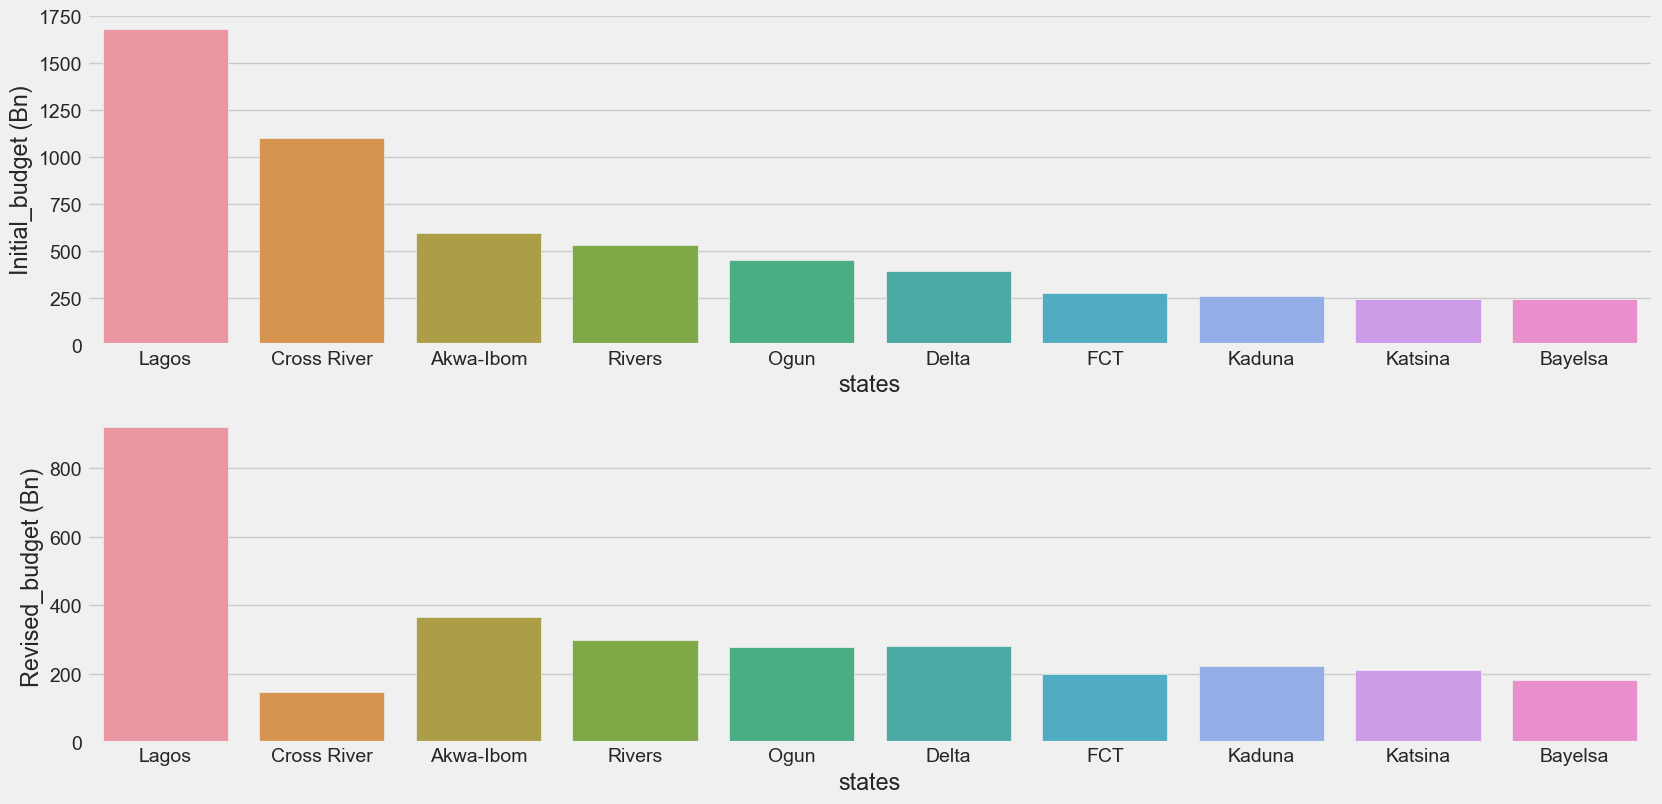

In [81]:
fig , axarr1 = plt.subplots(2, 1 , figsize=(18,9))
sns.barplot(x = 'states', y = 'Initial_budget (Bn)', data=tenbudget , ax = axarr1[0] )
sns.barplot(x = 'states', y = 'Revised_budget (Bn)', data=tenbudget , ax = axarr1[1] )


### The two graph above are plots of the various states budgets before covid and when covid hit nigeria. 
### it shown that the state budgets reduce when covid hit. eg Cross River State had a budget of 1100.0 Bn before covid and when covid hit it was revised to  147.0Bn . Therefore the pandemic really affected the state of Cross River allot and the country as a whole

## Ploting a graph of the first ten states with the high highest admission rate into hospitals

In [91]:
# this data frame store nigeria covid info
covidng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     Int64 
 2   No. of Cases (on admission)   37 non-null     Int64 
 3   No. Discharged                37 non-null     Int64 
 4   No. of Deaths                 37 non-null     int64 
 5   states                        37 non-null     object
dtypes: Int64(3), int64(1), object(2)
memory usage: 2.0+ KB


In [92]:
toptenhospitalize = covidng_df.nlargest(10,'No. of Cases (on admission)')

toptenhospitalize

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,states
1,FCT,9627,2840,6694,93,FCT
0,Lagos,26708,2435,24037,236,Lagos
2,Kaduna,4504,579,3877,48,Kaduna
4,Oyo,3788,368,3374,46,Oyo
3,Plateau,4262,280,3948,34,Plateau
21,Nasarawa,600,262,325,13,Nasarawa
5,Rivers,3279,232,2987,60,Rivers
11,Katsina,1405,214,1167,24,Katsina
8,Kano,2032,198,1778,56,Kano
14,Gombe,1164,183,950,31,Gombe


<AxesSubplot:xlabel='States Affected', ylabel='No. of Cases (on admission)'>

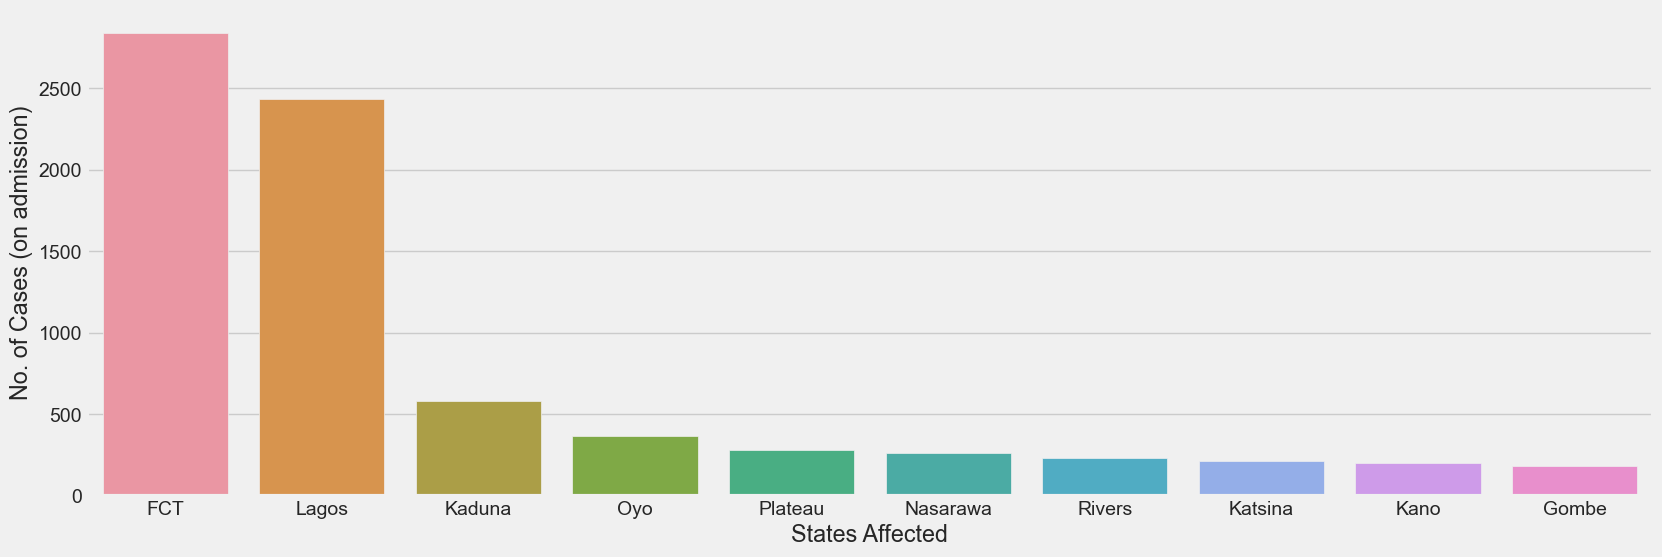

In [95]:
fig = plt.subplots(figsize=(18,6))
sns.barplot(data=toptenhospitalize, x = 'States Affected', y = 'No. of Cases (on admission)')

# From the plot above it can be seen that more admission where been taken in FCT as compared to lagos which had high covid cases. this might be because the security in FCT during the pandemic was quite good.